# Graduation Rotational Internship Program - Task-5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Exploring the Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.sum().isnull()

Ship Mode       False
Segment         False
Country         False
City            False
State           False
Postal Code     False
Region          False
Category        False
Sub-Category    False
Sales           False
Quantity        False
Discount        False
Profit          False
dtype: bool

In [5]:
# Looking at the Country column
df.Country.unique()

array(['United States'], dtype=object)

In [6]:
# Looking at the Region column
df.Region.unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [7]:
# Dividing into every region for simplicity
df_south = df[df['Region'] == 'South']
df_west = df[df['Region'] == 'West']
df_central = df[df['Region'] == 'Central']
df_east = df[df['Region'] == 'East']

In [8]:
df_south.sum()

Ship Mode       Second ClassSecond ClassStandard ClassStandard...
Segment         ConsumerConsumerConsumerConsumerConsumerCorpor...
Country         United StatesUnited StatesUnited StatesUnited ...
City            HendersonHendersonFort LauderdaleFort Lauderda...
State           KentuckyKentuckyFloridaFloridaNorth CarolinaFl...
Postal Code                                              55875052
Region          SouthSouthSouthSouthSouthSouthSouthSouthSouthS...
Category        FurnitureFurnitureFurnitureOffice SuppliesOffi...
Sub-Category    BookcasesChairsTablesStoragePaperStoragePaperC...
Sales                                                      391722
Quantity                                                     6209
Discount                                                   238.55
Profit                                                    46749.4
dtype: object

In [9]:
df_west.sum()

Ship Mode       Second ClassStandard ClassStandard ClassStanda...
Segment         CorporateConsumerConsumerConsumerConsumerConsu...
Country         United StatesUnited StatesUnited StatesUnited ...
City            Los AngelesLos AngelesLos AngelesLos AngelesLo...
State           CaliforniaCaliforniaCaliforniaCaliforniaCalifo...
Postal Code                                             293739752
Region          WestWestWestWestWestWestWestWestWestWestWestWe...
Category        Office SuppliesFurnitureOffice SuppliesTechnol...
Sub-Category    LabelsFurnishingsArtPhonesBindersAppliancesTab...
Sales                                                      725458
Quantity                                                    12266
Discount                                                    350.2
Profit                                                     108418
dtype: object

In [10]:
df_central.sum()

Ship Mode       Standard ClassStandard ClassStandard ClassStan...
Segment         Home OfficeHome OfficeConsumerCorporateCorpora...
Country         United StatesUnited StatesUnited StatesUnited ...
City            Fort WorthFort WorthMadisonFremontFremontHoust...
State           TexasTexasWisconsinNebraskaNebraskaTexasTexasT...
Postal Code                                             151786150
Region          CentralCentralCentralCentralCentralCentralCent...
Category        Office SuppliesOffice SuppliesOffice SuppliesO...
Sub-Category    AppliancesBindersStorageArtAppliancesPaperPhon...
Sales                                                      501240
Quantity                                                     8780
Discount                                                   558.34
Profit                                                    39706.4
dtype: object

In [11]:
df_east.sum()

Ship Mode       Second ClassStandard ClassStandard ClassStanda...
Segment         ConsumerConsumerConsumerConsumerConsumerConsum...
Country         United StatesUnited StatesUnited StatesUnited ...
City            PhiladelphiaPhiladelphiaPhiladelphiaPhiladelph...
State           PennsylvaniaPennsylvaniaPennsylvaniaPennsylvan...
Postal Code                                              50171698
Region          EastEastEastEastEastEastEastEastEastEastEastEa...
Category        FurnitureFurnitureOffice SuppliesFurnitureOffi...
Sub-Category    ChairsBookcasesBindersFurnishingsEnvelopesArtB...
Sales                                                      678781
Quantity                                                    10618
Discount                                                      414
Profit                                                    91522.8
dtype: object

## Plotting the Regional Profit using BarChart

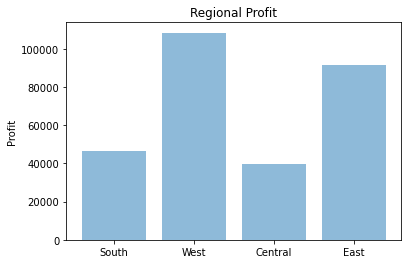

In [12]:
obj = ('South', 'West', 'Central', 'East')
y_pos = np.arange(len(obj))
performance = [46749.4, 108418, 39706.4, 91522.8]
plt.bar(y_pos, performance, align = 'center', alpha = 0.5)
plt.xticks(y_pos, obj)
plt.ylabel('Profit')
plt.title('Regional Profit')

plt.show()

As we can see from the graph also, we have the **Maximum Profit** in the **West Region** and the **Minimum Profit** in the **Central Region**.

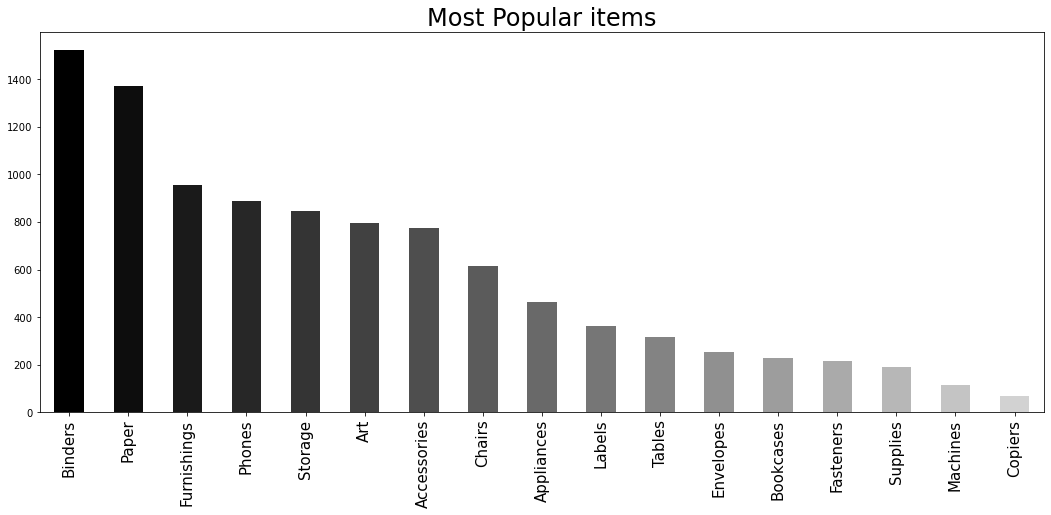

In [13]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gray(np.linspace(0, 2, 40))
df['Sub-Category'].value_counts().plot.bar(color = color)
plt.title('Most Popular items', fontsize = 24)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

The above plot shows that the most common items in all the regions are **Binders and Paper**

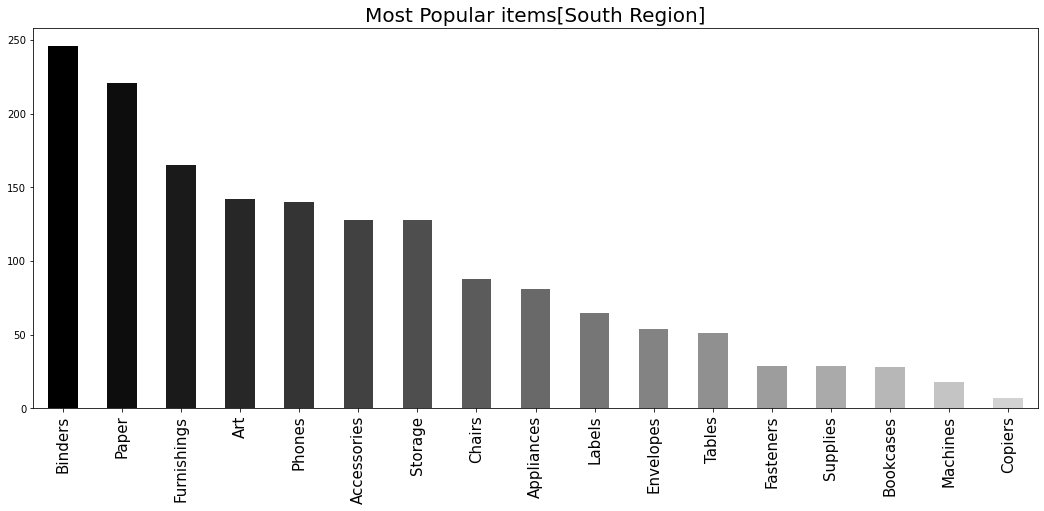

In [14]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gray(np.linspace(0, 2, 40))
df_south['Sub-Category'].value_counts().plot.bar(color = color)
plt.title('Most Popular items[South Region]', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In **South region** : Most Common Items are also **Binders and Paper**

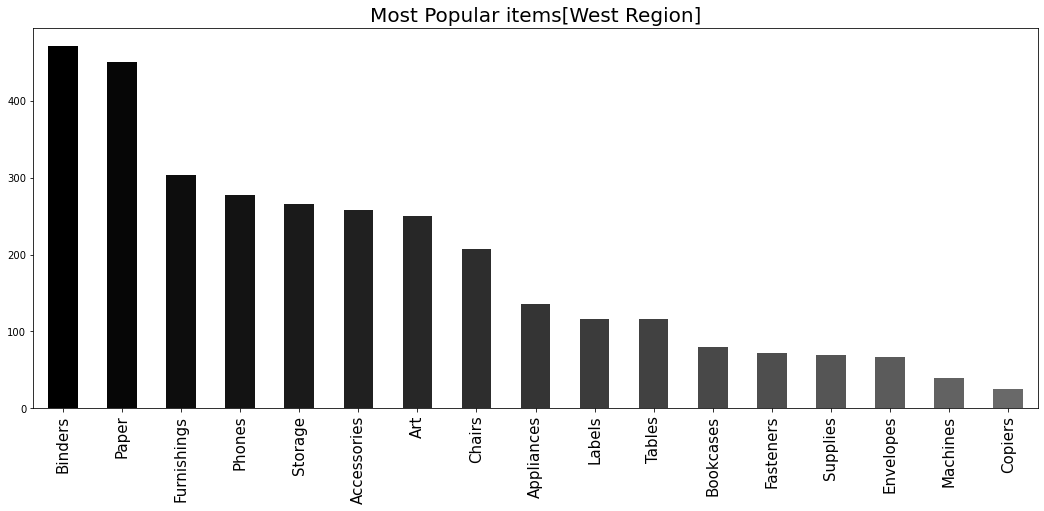

In [15]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gray(np.linspace(0, 1, 40))
df_west['Sub-Category'].value_counts().plot.bar(color = color)
plt.title('Most Popular items[West Region]', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In **West region** : Most Common Items are also **Binders and Paper**

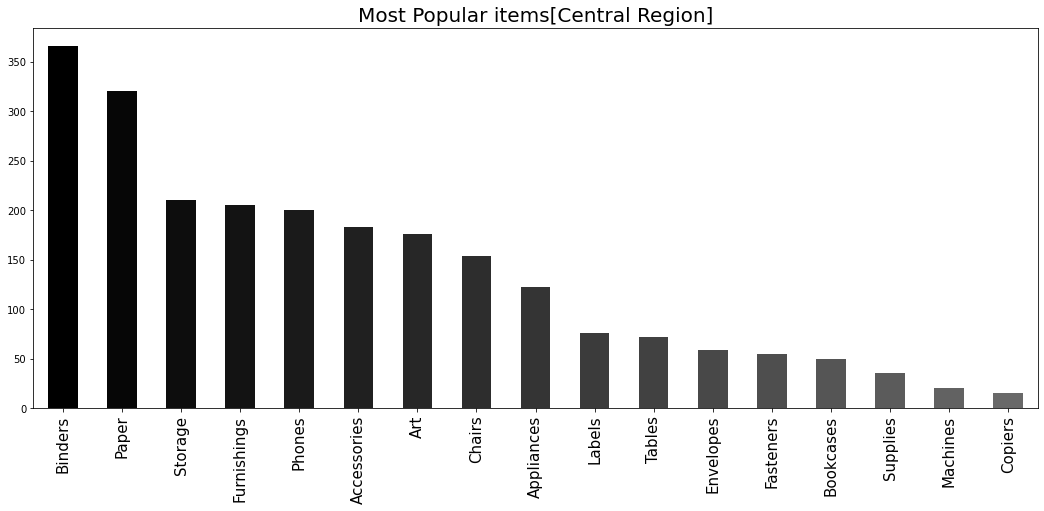

In [16]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gray(np.linspace(0, 1, 40))
df_central['Sub-Category'].value_counts().plot.bar(color = color)
plt.title('Most Popular items[Central Region]', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In **Central region** : Most Common Items are also **Binders and Paper**

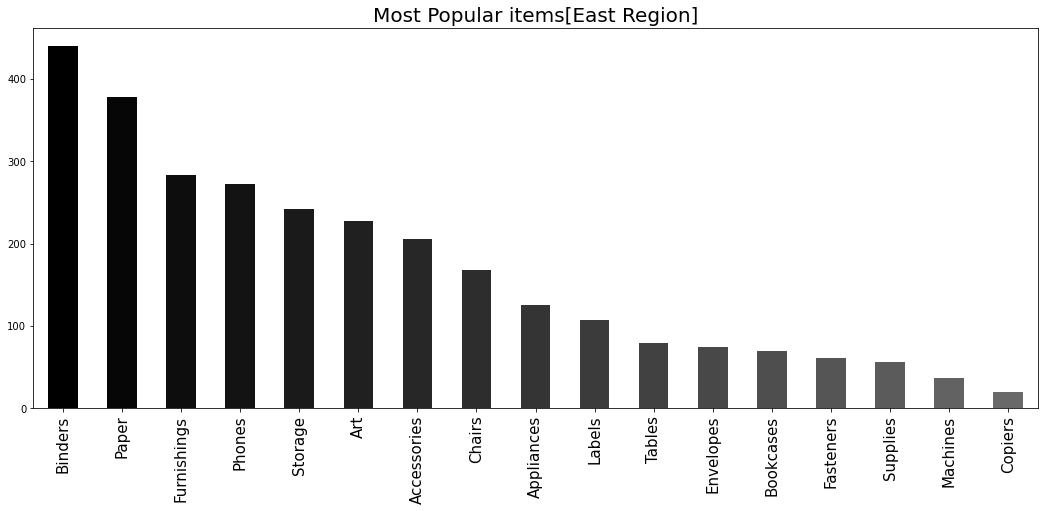

In [17]:
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.gray(np.linspace(0, 1, 40))
df_east['Sub-Category'].value_counts().plot.bar(color = color)
plt.title('Most Popular items[East Region]', fontsize = 20)
plt.xticks(rotation = 90, fontsize = 15)
plt.show()

In **East region** : Most Common Items are also **Binders and Paper**

## Regional Profit in each Category

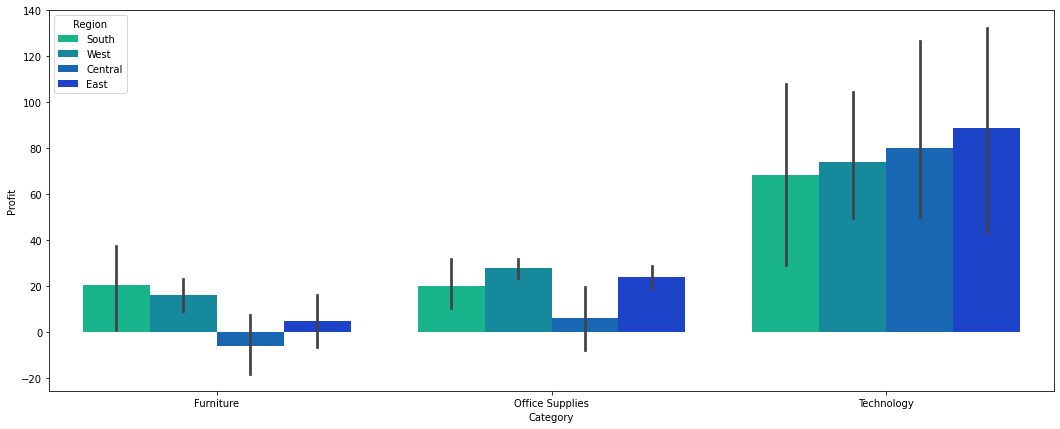

In [18]:
sns.barplot(x='Category', y='Profit', data=df, hue='Region', palette='winter_r')

The Above Plot Shows that the **Maximum Profit is in Technology for every region but in Funiture Category Central Region is not doing well**

## Regional Profit in each Segment

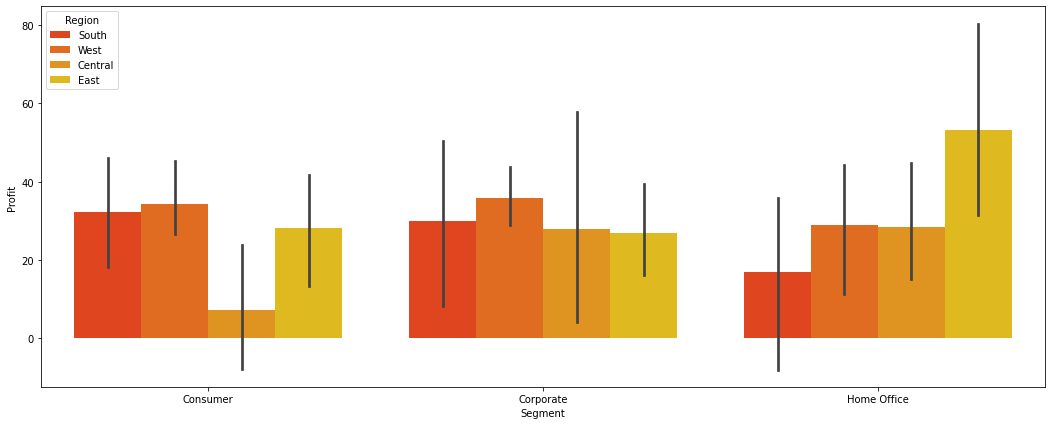

In [19]:
sns.barplot(x='Segment', y='Profit', data=df, hue='Region', palette='autumn')

In the above plot we can clearly see **Consumer Segment of Central Region is not doing well**

## Regionwise Profit for Every Ship Mode

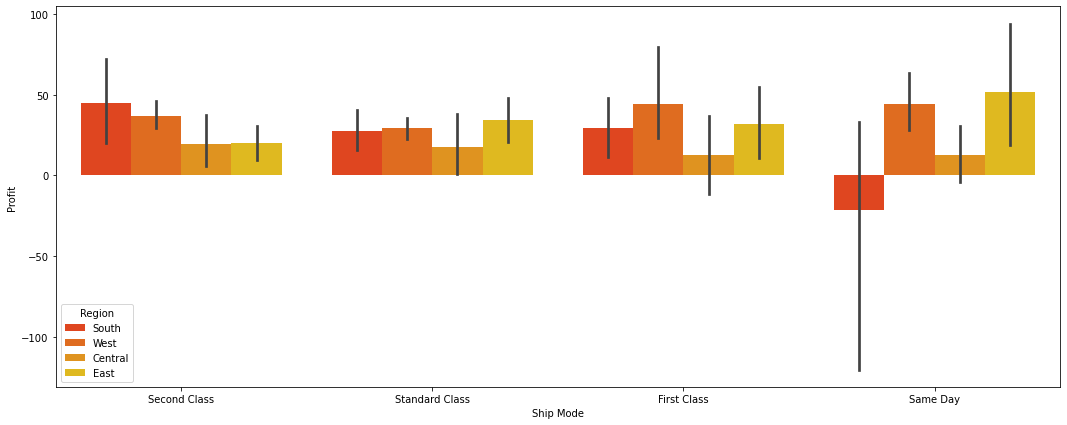

In [20]:
sns.barplot(x='Ship Mode', y='Profit', data=df, hue='Region', palette='autumn')

In the Plot Above we can see that there is *very much loss in same day delivery for South region* **Maybe we can build a Warehouse in there**

## Category wise Region Profit

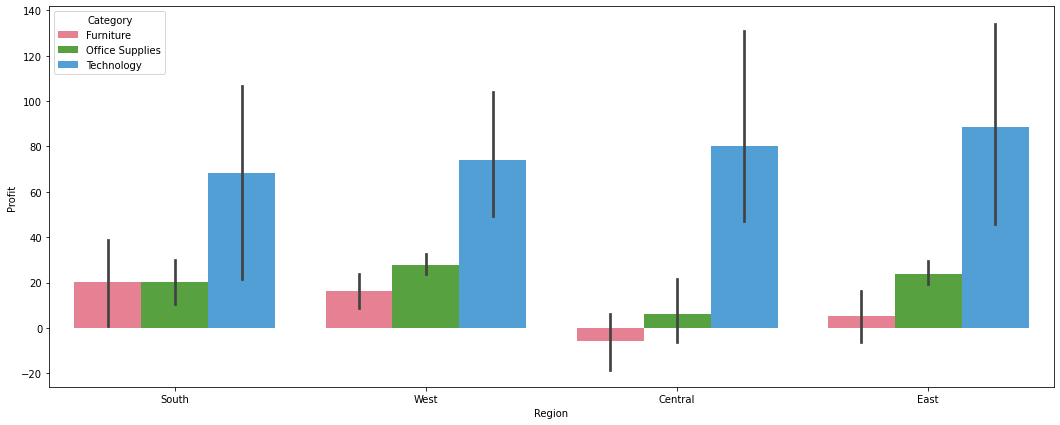

In [21]:
sns.barplot(x='Region', y='Profit', data=df, hue='Category', palette='husl')

In the above plot we can see that the **Central Region there are low on profits in furniture**

## Category wise Profit for Every State in East

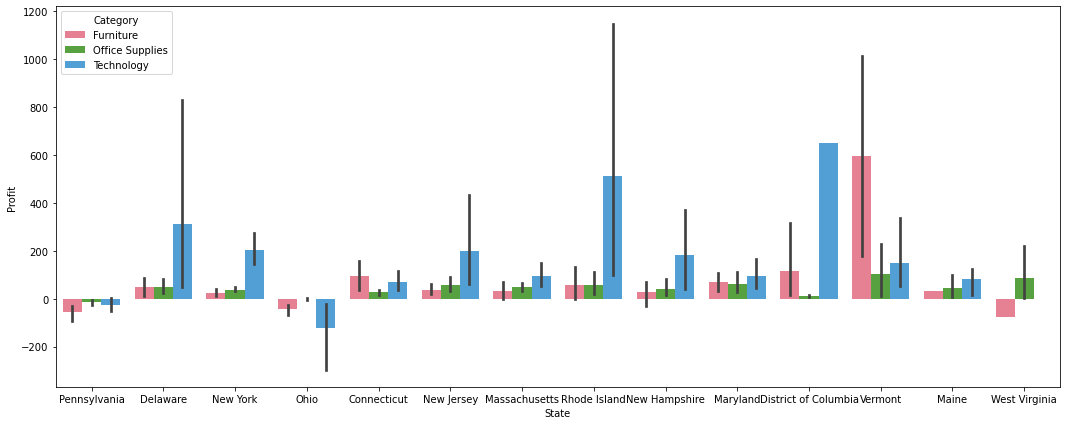

In [22]:
sns.barplot(x='State', y='Profit', data=df_east, hue='Category', palette='husl')

**Low Profit States in East Region**
 * Pennysylvenia{All Three Categories}
 * Ohio{Furniture and Technology}
 * West Virginia{Furniture}

**High Profit States in East Region**
 * Delaware{Technology}
 * Rhode Island{Technology}
 * Vermont{Furniture}
 * District of Columbia{Technology}

## Category wise Profit for Every State in West

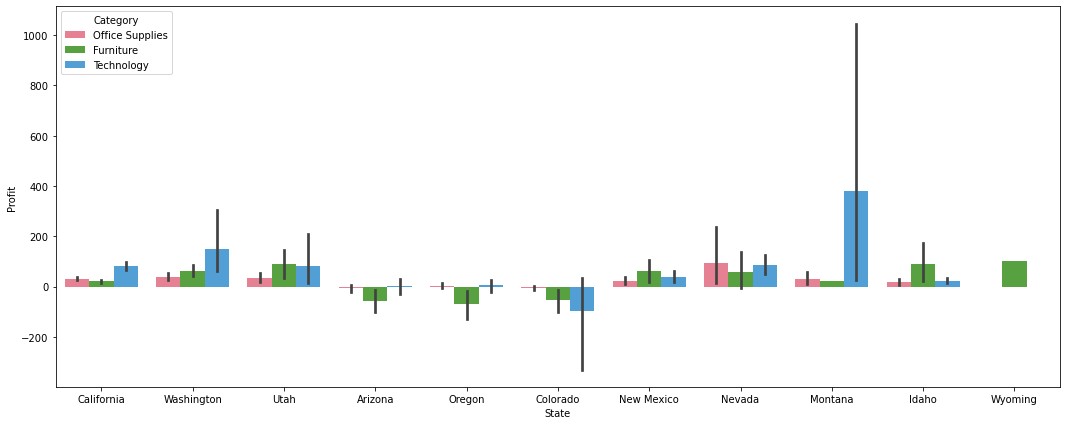

In [23]:
sns.barplot(x='State', y='Profit', data=df_west, hue='Category', palette='husl')

**Low Profit States in West Region**
 * Arizona{All three Categories}
 * Oregon{All three Categories}
 * Colorado State{All three Categories}

**High Profit States in West Region**
 * Montana{Technology}

## Category wise Profit for Every State in South

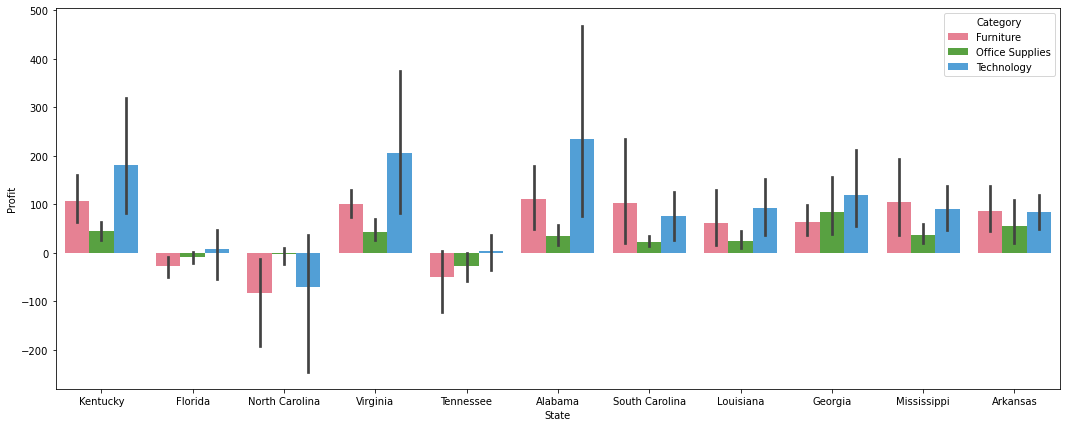

In [24]:
sns.barplot(x='State', y='Profit', data=df_south, hue='Category', palette='husl')

**Low Profit States in South Region**
 * Florida{Furniture}
 * North Carolina{All three Categories}
 * Tennessee{Furniture and Office Supplies}

**High Profit States in South Region**
 * Virginia{Technology}
 * Albama State{Technology}
 * Kentucky{Technology}

## Category wise Profit for Every State in Central

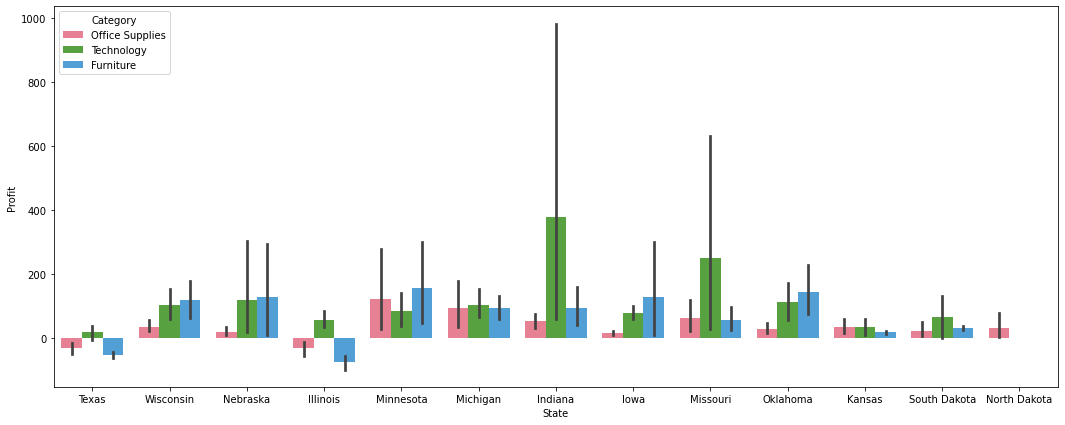

In [25]:
sns.barplot(x='State', y='Profit', data=df_central, hue='Category', palette='husl')

**Low Profit States in South Region**
 * Texas{Furniture and Office Supplies}
 * Illinois{Furniture and Office Supplies}

**High Profit States in South Region**
 * Indiana State{Technology}
 * Missouri{Technology}

## Pair Plot by Seaborn

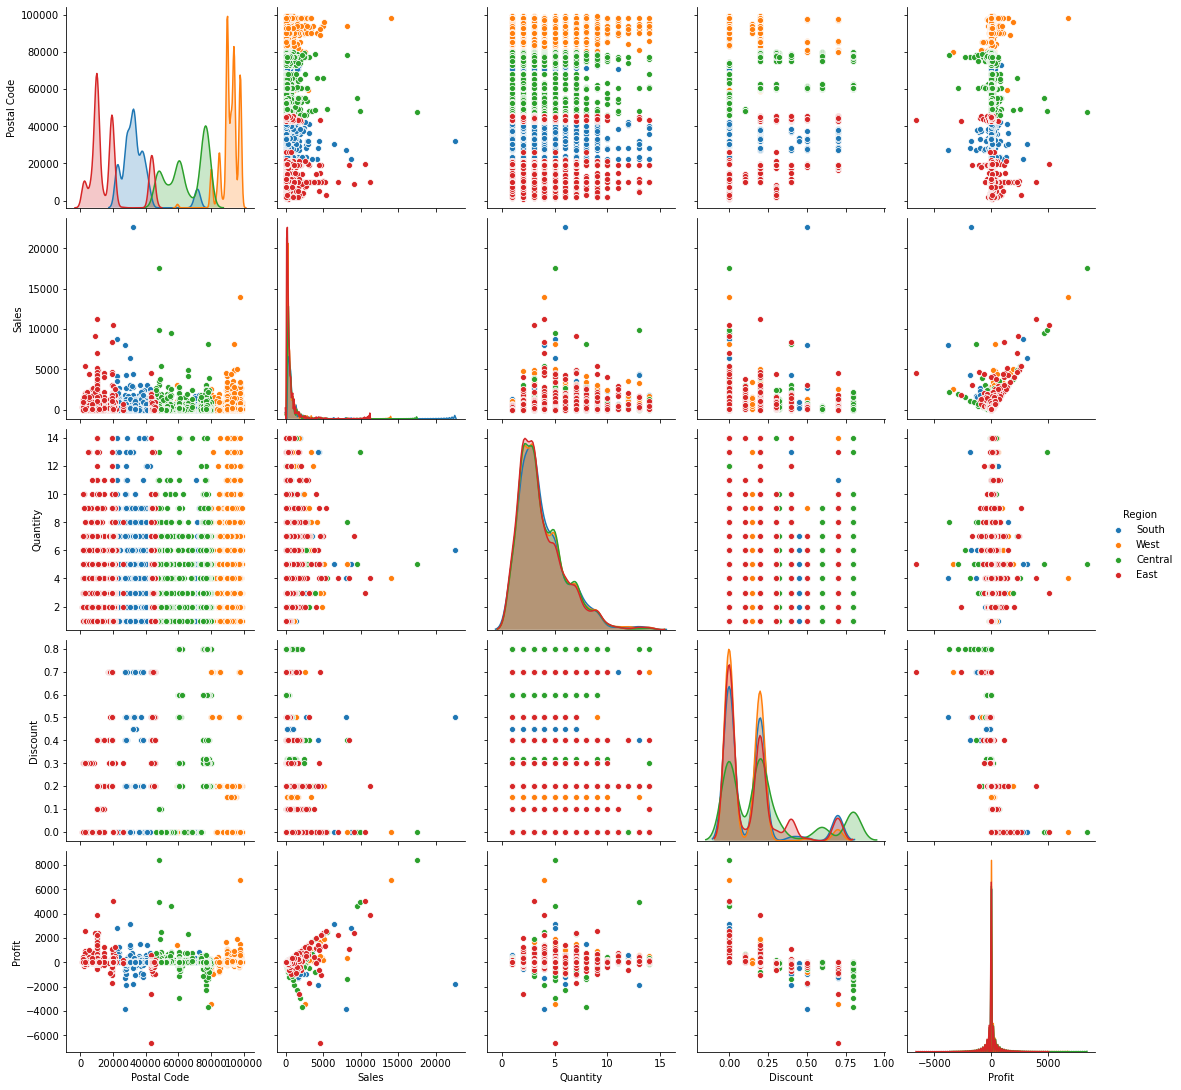

In [26]:
sns.pairplot(df, hue = 'Region', height = 3)

## Profit by Discount

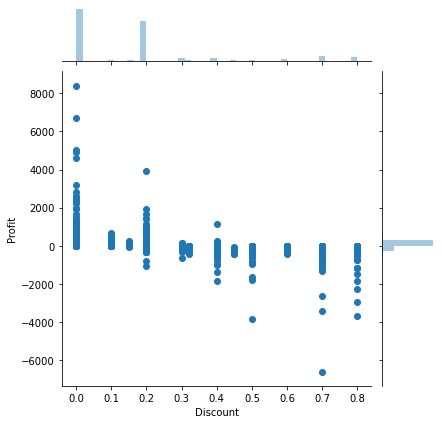

In [27]:
sns.jointplot(x='Discount', y='Profit', data=df)

In [28]:
df['P/S'] = df['Profit']/df['Sales']
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,P/S
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


## Region wise Profit/Sales Ratio for Each Category

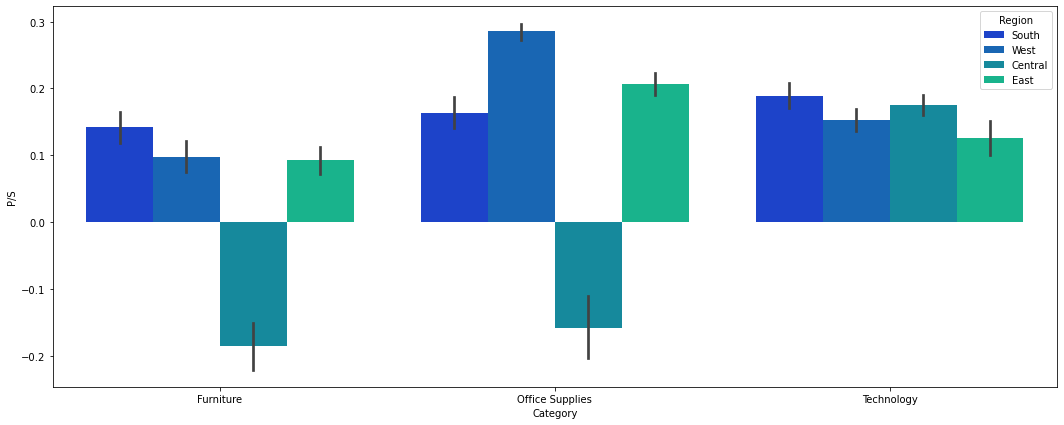

In [29]:
sns.barplot(x='Category', y='P/S', data=df, hue='Region', palette='winter')